. Separate into positions
.

In [1]:
import sys
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append('../')

In [3]:
df_draft = pd.read_csv('../data/raw_nfl_draft.csv')

## Data Cleaning

In [6]:
#A partir da linha 5763 temos alguns valores trocados.
#Coloco os nomes das Universidades e as demais estatisticas nas colunas correspondentes
temp_int = df_draft['Tkl'][5763:8436] 
temp_sk = df_draft['Def_Int'][5763:8436]
temp_coll = df_draft['Sk'][5763:8436]

In [7]:
df_draft.loc[5793:8435, 'College/Univ'] = temp_coll

In [8]:
df_draft.loc[5793:8435, 'Sk'] = temp_sk

In [9]:
df_draft.loc[5793:8435, 'Def_Int'] = temp_int

In [10]:
df_draft.loc[5793:8435, 'Tkl'] = 0

In [11]:
#Set some NaN values to 0. Se esse valores estão ausentes, eles não foram realmente computados. É normal eles estarem ausentes
cols_to_zero = list(df_draft.columns[17:31])
df_draft[cols_to_zero] = df_draft[cols_to_zero].fillna(value=0)

In [12]:
#Jogadores que não tem o ano na coluna "To" são assumidos como não terem jogado, ou seja, são irrelevantes. Podemos remover essas linhas
df_draft = df_draft[np.isfinite(df_draft['To'])]

In [13]:
#Valores nulos em Player_ID ( % )
df_draft['Player_Id'].isna().sum() / len(df_draft) * 100

0.0

In [14]:
#Cria coluna com os anos de carreira de cada jogador (Inclui ultimo ano)
df_draft['carrer_years'] = (df_draft['To'] - df_draft['Year']) + 1

In [21]:
df_draft.drop('Unnamed: 32',axis=1,inplace=True)

In [25]:
df_draft['Age'].fillna(22,inplace=True)

In [27]:
df_draft.describe()

,Year,Rnd,Pick,First4AV,Age,To,AP1,PB,St,CarAV,...,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,carrer_years
count,7053.000000,6845.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,...,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000
mean,1999.968099,4.437838,124.290940,11.872253,22.633631,2004.610804,0.088048,0.329931,2.189281,17.276195,...,1.593081,47.175386,193.171700,1.354034,32.535659,382.813980,2.280873,50.049482,1.519495,5.642705
std,9.099250,2.532512,78.395371,13.536436,0.842984,9.061308,0.508064,1.202619,3.127566,22.390409,...,12.982471,235.031017,988.638502,7.170983,106.574372,1367.736885,9.037410,122.064915,5.293794,3.580205
min,1985.000000,1.000000,1.000000,-4.000000,20.000000,1985.000000,0.000000,0.000000,0.000000,-4.000000,...,0.000000,0.000000,-36.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,0.000000,1.000000
25%,1992.000000,2.000000,58.000000,1.000000,22.000000,1997.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2000.000000,4.000000,117.000000,6.000000,23.000000,2006.000000,0.000000,0.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000
75%,2008.000000,6.000000,186.000000,19.000000,23.000000,2013.000000,0.000000,0.000000,3.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,18.000000,0.000000,25.000000,0.000000,8.000000
max,2015.000000,12.000000,336.000000,88.000000,29.000000,2016.000000,10.000000,14.000000,19.000000,177.000000,...,336.000000,4409.000000,18355.000000,164.000000,1549.000000,22895.000000,197.000000,1562.000000,95.500000,21.000000


In [23]:
#Save to another .csv
df_draft.to_csv('../data/clean_nfl_draft.csv')

In [30]:
#Create profiling report

profile = pandas_profiling.ProfileReport(df_draft)
profile.to_file(outputfile="../reports/Profile_Draft.html")

## Do some EDA

In [38]:
positions = list(set(df_draft['Position Standard']))
df_positions = {}
info = list()
for pos in positions:
    df_positions[pos] = df_draft[df_draft['Position Standard'] == pos]

In [39]:
colleges = set(df_draft['College/Univ'])

In [43]:
len(colleges)

356

In [41]:
total_by_pos = {}
for pos in positions:
    total_by_pos[pos] = len(df_positions[pos])

In [34]:
dict_college = {}
for coll in colleges:
    dict_college[coll] = df_draft[df_draft['College/Univ'] == coll]
total_by_college = {}    
for coll in colleges:
    total_by_college[coll] = len(dict_college[coll])

In [37]:
total_by_college

{nan: 0,
 'Texas A&M-Commerce': 2,
 'Albion': 1,
 'Illinois': 56,
 'Minnesota-Duluth': 1,
 'East. Washington': 9,
 'SMU': 19,
 'Anderson (IN)': 1,
 'Kent St.': 10,
 'Livingstone': 2,
 'Delaware': 9,
 'Vanderbilt': 30,
 'Florida': 133,
 'East. Illinois': 5,
 'Richmond': 7,
 'Portland St.': 1,
 'Iowa St.': 20,
 'San Jose St.': 14,
 'Texas A&M': 103,
 'Robert Morris': 1,
 'Lane College': 1,
 'Carson-Newman': 3,
 'West. Ontario': 1,
 'Princeton': 3,
 'Nevada': 20,
 'Rhode Island': 1,
 'Southern Connecticut St.': 2,
 'North Dakota St.': 9,
 'Louisville': 53,
 'Tenn-Martin': 3,
 'Abilene Christian': 4,
 'Towson': 5,
 'Georgia': 101,
 'Gardner-Webb': 3,
 'Ohio St.': 132,
 'Northern Colorado': 5,
 'Grambling St.': 19,
 'Florida St.': 148,
 'NW Missouri St.': 5,
 'Texas Tech': 32,
 'West Texas A&M': 3,
 'Kentucky': 42,
 'California-Davis': 2,
 'Lambuth': 1,
 'Missouri Southern': 3,
 'Langston': 2,
 'Arizona': 66,
 'Bethune-Cookman': 6,
 'Washington': 89,
 'Tuskegee': 2,
 'Oklahoma': 108,
 'Hend

In [42]:
total_by_pos

{'LB': 961,
 'TE': 428,
 'G': 425,
 'FB': 75,
 'K': 59,
 'QB': 299,
 'T': 497,
 'C': 187,
 'DB': 1358,
 'P': 56,
 'LS': 1,
 'RB': 673,
 'WR': 860,
 'DT': 537,
 'DE': 637}

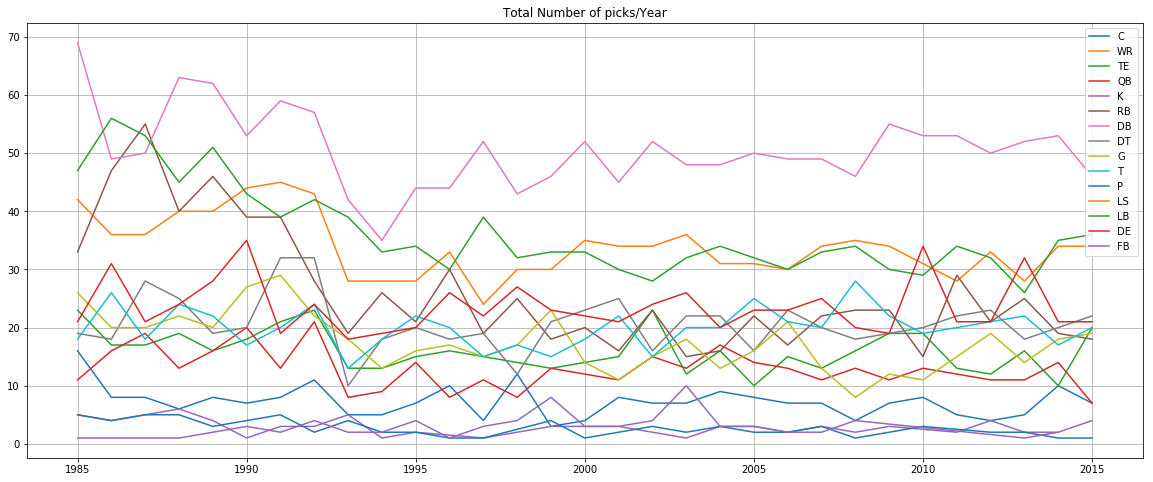

In [29]:
plt.figure(figsize=(20,8))
title = "Total Number of picks/Year"
plt.title(title)
plt.grid(axis="both")
for pos in positions:
    plt.plot(df_positions[pos].groupby('Year').count()['Pick'])
    plt.legend(positions)

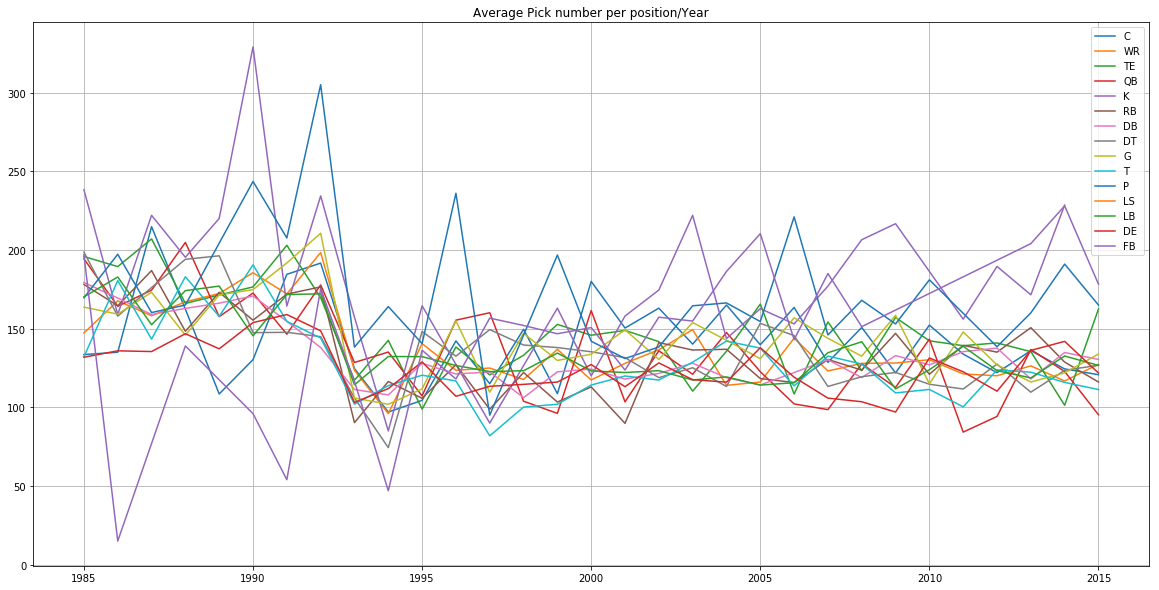

In [32]:
plt.figure(figsize=(20,10))
title = "Average Pick number per position/Year"
plt.title(title)
plt.grid(axis="both")
for pos in positions:
    plt.plot(df_positions[pos].groupby('Year').mean()['Pick'])
    plt.legend(positions)

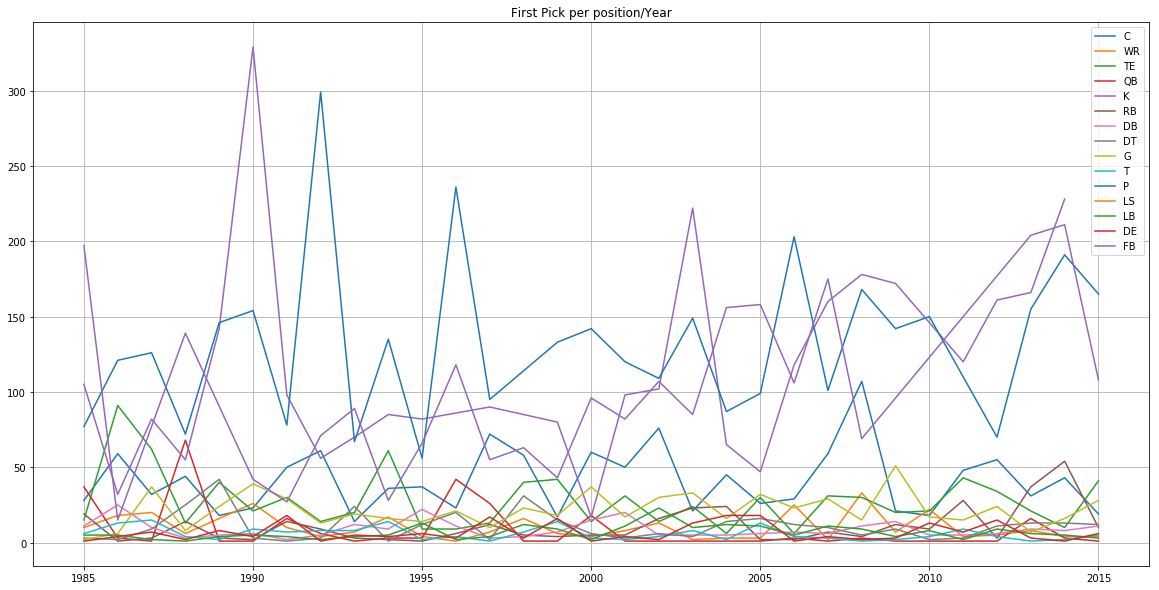

In [33]:
plt.figure(figsize=(20,10))
title = "First Pick per position/Year"
plt.title(title)
plt.grid(axis="both")
for pos in positions:
    plt.plot(df_positions[pos].groupby('Year').min()['Pick'])
    plt.legend(positions)

{'Abilene Christian',
 'Air Force',
 'Akron',
 'Ala-Birmingham',
 'Alabama',
 'Alabama A&M',
 'Alabama St.',
 'Albany',
 'Albany (NY)',
 'Albany State (GA)',
 'Albion',
 'Alcorn St.',
 'Angelo State (TX)',
 'Appalachian St.',
 'Arizona',
 'Arizona St.',
 'Ark-Pine Bluff',
 'Arkansas',
 'Arkansas A&M',
 'Arkansas St.',
 'Army',
 'Ashland',
 'Auburn',
 'Augustana (SD)',
 'Austin Peay St.',
 'BYU',
 'Ball St.',
 'Baylor',
 'Bentley',
 'Bethune-Cookman',
 'Bloomsburg',
 'Boise St.',
 'Boston Col.',
 'Bowling Green',
 'Brown',
 'Buffalo',
 'Butte JC (CA)',
 'C.W. Post',
 'Cal Poly-SLO',
 'Cal Poly-San Luis Obispo',
 'Cal State-Sacramento',
 'California',
 'California (PA)',
 'California-Davis',
 'Central Arkansas',
 'Central Connecticut St.',
 'Central Florida',
 'Central Michigan',
 'Central Missouri St.',
 'Central Oklahoma',
 'Central State (OH)',
 'Chadron St.',
 'Chattanooga',
 'Cincinnati',
 'Citadel',
 'Clemson',
 'Coastal Carolina',
 'Colorado',
 'Colorado St.',
 'Columbia',
 'Conco

Text(0.5,1,'Total Number of Quaterback picks/Year')

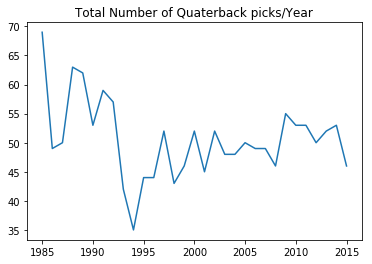

In [23]:
plt.plot(df_positions['DB'].groupby('Year').count()['Pick'])
plt.title("Total Number of Quaterback picks/Year")

Text(0.5,1,'Average Quarterback Pick number/Year')

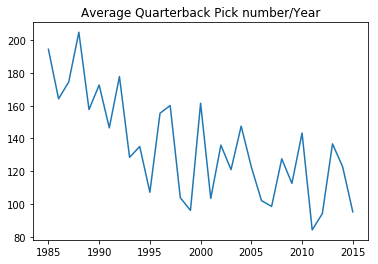

In [114]:
plt.plot(df_positions['QB'].groupby('Year').mean()['Pick'])
plt.title("Average Quarterback Pick number/Year")

Text(0.5,1,'Total Number of Running Backs picks/Year')

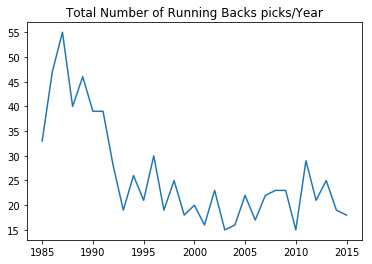

In [115]:
plt.plot(df_positions['RB'].groupby('Year').count()['Pick'])
plt.title("Total Number of Running Backs picks/Year")

Text(0.5,1,'Average Running Back Pick number/Year')

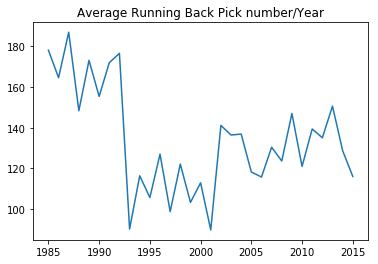

In [116]:
plt.plot(df_positions['RB'].groupby('Year').mean()['Pick'])
plt.title("Average Running Back Pick number/Year")

Text(0.5,1,'Total Number of Wide Receivers picks/Year')

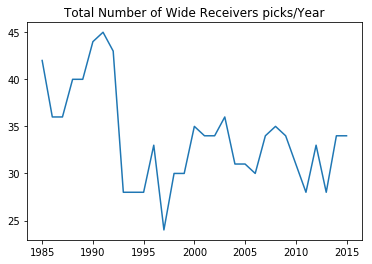

In [117]:
plt.plot(df_positions['WR'].groupby('Year').count()['Pick'])
plt.title("Total Number of Wide Receivers picks/Year")

Text(0.5,1,'Average Wide Receiver Pick number/Year')

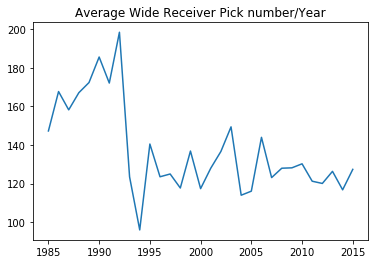

In [102]:
plt.plot(df_positions['WR'].groupby('Year').mean()['Pick'])
plt.title("Average Wide Receiver Pick number/Year")

In [119]:
df_positions['QB'].groupby('Year').mean()

,Rnd,Pick,First4AV,Age,To,AP1,PB,St,CarAV,DrAV,...,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int
Year,,,,,,,,,,,,,,,,,,,,,
1985,7.545455,194.363636,6.272727,22.666667,1996.666667,0.090909,0.545455,1.363636,35.000000,18.800000,...,81.200000,59.800000,272.800000,1397.600000,10.400000,1.500000,-2.000000,0.000000,NaN,NaN
1986,6.500000,164.187500,11.375000,22.846154,1992.000000,0.000000,0.187500,1.625000,18.307692,14.500000,...,45.000000,45.909091,62.307692,151.153846,1.846154,2.000000,-8.000000,0.000000,NaN,NaN
1987,6.736842,174.421053,10.157895,22.500000,1994.500000,0.105263,0.526316,2.473684,32.928571,18.111111,...,68.785714,59.857143,166.928571,699.000000,5.714286,2.000000,4.000000,0.000000,NaN,NaN
1988,7.923077,204.769231,4.538462,22.600000,1998.800000,0.076923,0.230769,1.615385,32.200000,4.666667,...,55.200000,53.800000,119.800000,397.600000,4.200000,1.500000,7.000000,0.000000,NaN,NaN
1989,6.125000,157.625000,7.125000,23.000000,1995.000000,0.000000,0.375000,1.250000,22.250000,24.333333,...,39.375000,40.000000,125.500000,452.500000,5.000000,2.000000,-19.000000,0.000000,NaN,NaN
1990,6.850000,172.600000,6.950000,22.636364,1996.181818,0.000000,0.050000,1.100000,19.545455,9.000000,...,40.363636,31.454545,62.909091,147.818182,1.636364,1.000000,-6.000000,0.000000,NaN,NaN
1991,5.769231,146.461538,8.076923,22.600000,1997.400000,0.230769,0.846154,1.692308,20.600000,2.571429,...,59.700000,45.200000,87.400000,257.800000,1.600000,2.000000,-7.000000,0.000000,NaN,NaN
1992,6.809524,177.761905,6.000000,22.846154,1999.076923,0.000000,0.142857,1.142857,18.692308,6.083333,...,38.076923,33.384615,108.181818,402.090909,3.090909,1.000000,2.500000,0.250000,NaN,NaN
1993,NaN,128.500000,13.750000,22.625000,2003.375000,0.000000,1.250000,5.000000,48.125000,18.166667,...,98.250000,79.375000,201.625000,725.375000,6.125000,2.000000,-8.000000,0.000000,NaN,NaN


In [110]:
df_draft[(df_draft['Position Standard'] == 'WR') & (df_draft['Year'] == 1985)]

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
8108,ToonAl00,1985,1.0,10,NYJ,Al Toon,WR,WR,42,22.0,...,7.0,0.0,517.0,6605.0,31.0,NaN,NaN,Wisconsin,NaN,NaN
8111,BrowEd00,1985,1.0,13,CIN,Eddie Brown,WR,WR,51,22.0,...,164.0,0.0,363.0,6134.0,41.0,NaN,NaN,Miami (FL),NaN,NaN
8114,RiceJe00,1985,1.0,16,SFO,Jerry Rice HOF,WR,WR,69,22.0,...,645.0,10.0,1549.0,22895.0,197.0,NaN,NaN,Miss. Valley St.,NaN,NaN
8121,HestJe00,1985,1.0,23,RAI,Jessie Hester,WR,WR,12,22.0,...,53.0,1.0,373.0,5850.0,29.0,NaN,NaN,Florida St.,NaN,NaN
8129,JohnVa00,1985,2.0,31,DEN,Vance Johnson,WR,WR,36,22.0,...,44.0,0.0,415.0,5695.0,37.0,NaN,NaN,Arizona,NaN,NaN
8140,BurkCh00,1985,2.0,42,BUF,Chris Burkett,WR,WR,20,23.0,...,-6.0,0.0,292.0,4352.0,19.0,NaN,NaN,Jackson St.,NaN,NaN
8144,RobiSt00,1985,2.0,46,NYG,Stacy Robinson,WR,WR,6,23.0,...,NaN,NaN,48.0,749.0,7.0,NaN,NaN,North Dakota St.,NaN,NaN
8148,ScotCh22,1985,2.0,50,RAM,Chuck Scott,WR,WR,1,22.0,...,NaN,NaN,6.0,87.0,0.0,NaN,NaN,Vanderbilt,NaN,NaN
8176,ManeJa20,1985,3.0,78,CHI,James Maness,WR,WR,0,22.0,...,NaN,NaN,1.0,34.0,0.0,NaN,NaN,TCU,NaN,NaN
8177,MoffTi00,1985,3.0,79,RAI,Tim Moffett,WR,WR,3,23.0,...,1.0,0.0,16.0,247.0,1.0,NaN,NaN,Mississippi,NaN,NaN
